In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [ ]:
# import dataset
from google.colab import files
files = files.upload()

Saving halamanharga.csv to halamanharga.csv


In [ ]:
dataharga = pd.read_csv('halamanharga.csv')
dataharga = dataharga[['pages','price']]
print(dataharga)

     pages   price
0      384  237200
1      320  245285
2      517  225939
3      352  345766
4      320  293793
..     ...     ...
462    279   86478
463    156  216411
464    319  259722
465    336  216555
466    376  229115

[467 rows x 2 columns]


In [ ]:
scaler = MinMaxScaler()
dataharga = scaler.fit_transform(dataharga)

In [ ]:
min_clusters = 2
max_clusters = 10

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

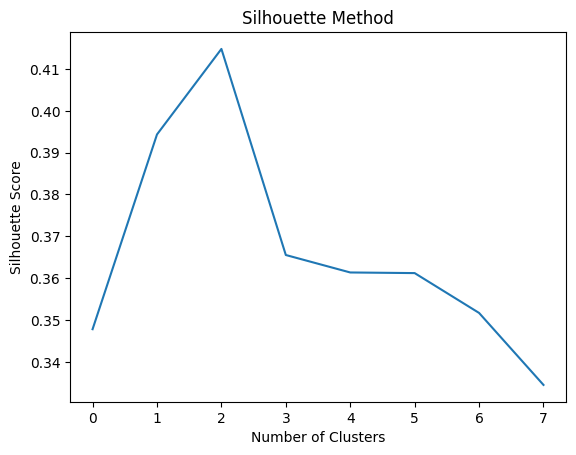

In [ ]:
# Menentukan nilai Silhouette Score untuk tiap nilai k
silhouette_scores = []

for i in range(min_clusters, max_clusters):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit_predict(dataharga)
  s_score = silhouette_score(dataharga, kmeans.labels_)
  silhouette_scores.append(s_score)

plt.plot(silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


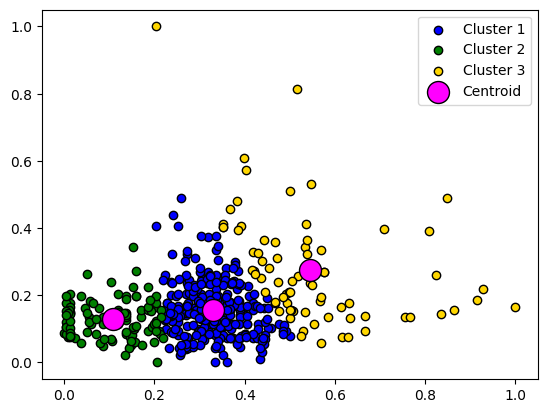

In [ ]:
# Melakukan klastering dengan k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
x = kmeans.fit_predict(dataharga)

#Memvisualisasikan hasil clustering dengan menampilkan scatter plot
plt.scatter(dataharga[x == 0, 0], dataharga[x == 0, 1], c = "blue",edgecolor='black', label = "Cluster 1")
plt.scatter(dataharga[x == 1, 0], dataharga[x == 1, 1], c = "green",edgecolor='black', label = "Cluster 2")
plt.scatter(dataharga[x == 2, 0], dataharga[x == 2, 1], c = "gold",edgecolor='black', label = "Cluster 3")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = "magenta",edgecolor='black', label = "Centroid")

plt.legend()
